Here are some more matching results, and an idea for how to use the matching that might compensate for the fact that it's still not great.

All diagnostics so far are done on people in LA (1.3million women, so lots of potential matches).  Also, I used a common drug (simvastatin, 2.5m takers) and an less common drug (adalimumab, 78k takers).  I also looked at a smaller county.  It seems to work ok for simvastatin  but out of 67 adalimumab takers only 1 matched in the smaller county.

Below, are the different bins sizes (one bin being, LA 65 year olds with 9 month period containing diagnoses of exactly the same set of diseases in the county).   The first one has Simvastatin with 1800 bins, and the second is adalimumab, with 52 bins.

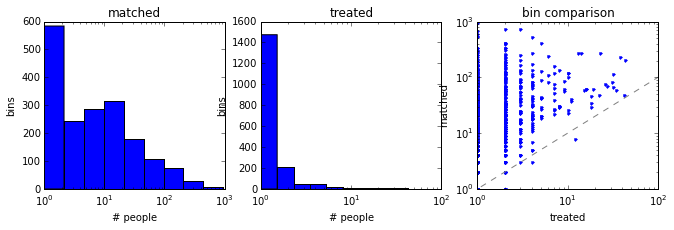

In [5]:
Image(filename='pngs/simvastatin.LA.png',width=800)

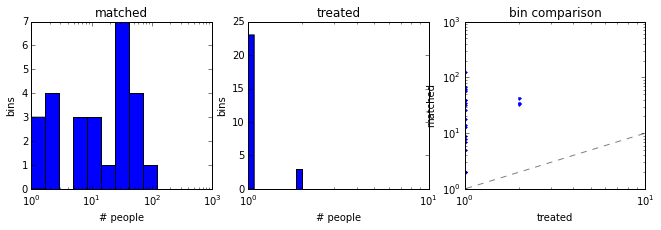

In [6]:
Image(filename='pngs/adalimumab.LA.png',width=800)

I assessed balance using Mantel-Haenzel type comparisons again, with stratified contingency tables.  The strata are the bins, which are pretty small (usually 1 person in the treatment group and a few people in the match group). 

Below, are the phenotypes that are the most different in simvastatin between treated vs matched people.  The columns are:
- **Mantel-Haenzel** measure of imbalance (p-value using a chi2 statistic).
- **match-phe**:  number of matched people with this phenotype across all bins
- **match-phe.weighted**:  this is a weighted sum, across the bins.  $ MatchPhe.weighted = \sum_{b \in bins} { matchPhe_b * {|treat_b|\over |match_b |} } $.  This should be directly comparable to treat-phe
- **treat-phe**: number of  treated people with this phenotype, across all bins.  

I dont think this analysis would work well with adalimumab, which only has 52 matched drug-takers in LA. 

In [8]:
pd.read_table('pngs/simvastatin_matching.txt',sep='\t',index_col=0)

,Mantel-Haenzel,match-phe,match-phe.weighted,treat-phe
Non_Specific_Joint_Disorder,5.380260e-08,5513,374.216338,289
Keratosis,6.025586e-07,2095,145.094690,97
Non_Melanoma_Skin_Cancer,1.361347e-03,1235,91.027349,61
Pure_Hypercholesterolemia,4.456612e-03,2492,314.829809,282
Corneal_Disorders,5.057853e-03,244,22.004690,9
Hernia,2.235595e-02,238,24.025891,12
Ocular_Musculoskeletal_Disorder,2.862799e-02,106,8.098253,1
Non_Specific_Thryroid_Disorder,3.571192e-02,126,9.937916,2
Chronic_Tonsillitis_Adenoiditis,7.389774e-02,49,1.673474,4
Pituitary_Disorder,1.444591e-01,45,5.545924,2


Although this seems to indicated a serious difference between the matched and treated patients, perhaps we can overcome this using a difference-in-differences approach in the number of cancers.  For each person who takes a drug, we use the set of Dx they had 9 months before this, and find people who are the same age with the same Dx in a 9 month period (the matching period). Then we define time windows of interest, before and after these times.  So we can count:
- TA = number cancers in `effectWindow` after treatment
- TB = number cancers in `comparisonWindow` before treatment
- MA = number cancers in `effectWindow` after the period of matching
- MB = number of cancers in `comparisonWindow` time before this.

Then we can calculate an expected number of cancers:
$$ E = TB \times { MA \over MB } $$

And compare this to the observed number of cancers, TA: 
$$ RR = { TA \over E } $$



In [1]:
from IPython.display import Image